Plot the different salinity profiles from the CNV file.<br>
There is only one sensor measuring salinity, but two values are stored for each depth.

In [27]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from seabird.cnv import fCNV
from matplotlib import rcParams
%matplotlib inline

In [23]:
rcParams.update({'font.size': 16})

In [24]:
datadir = "/home/vessel/RTDATA/socib_rv/SCB-SBE9001/rawArchive/dep0001_socib-rv_scb-sbe9001_L1_2014-02-17/cnv_files/sampling_5m"

In [25]:
filelist = sorted(glob.glob(os.path.join(datadir, 'd*.cnv')))
nfiles = len(filelist)
print(nfiles)

26


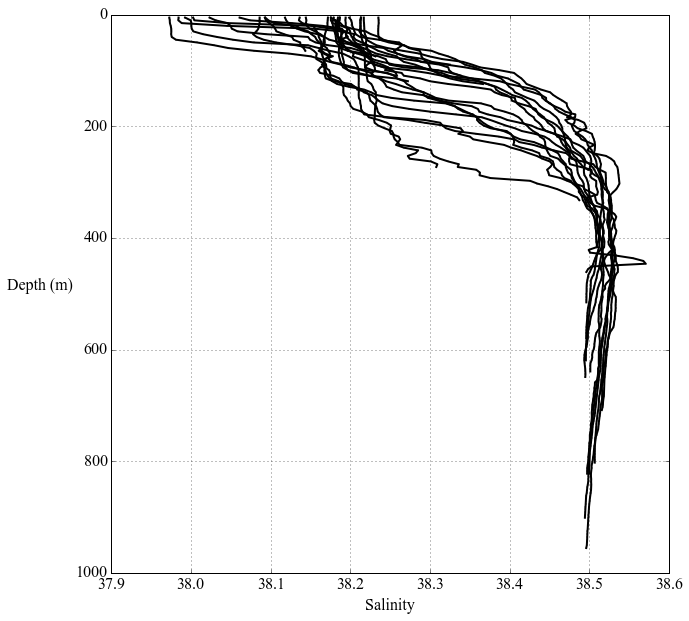

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.invert_yaxis()

for datafiles in filelist:
    profile = fCNV(datafiles)
    # print profile.keys()
    depth = profile['DEPTH']
    salinity = profile['PSAL']
    plt.plot(salinity, depth, 'ko-', markersize=0.5)

plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Depth (m)', rotation=0, ha='right')
plt.show()

The problem with the Seabird module is that we cannot select the two columns containing the same variable.<br>
So we can implement a small function to read these files.

In [28]:
def read_seabird(datafile):
    data = np.loadtxt(datafile, comments=['#', '*'])
    salinity1 = data[:,6]
    salinity2 = data[:,11]
    return salinity1, salinity2

In [29]:
salinity1, salinity2 = read_seabird(datafiles)

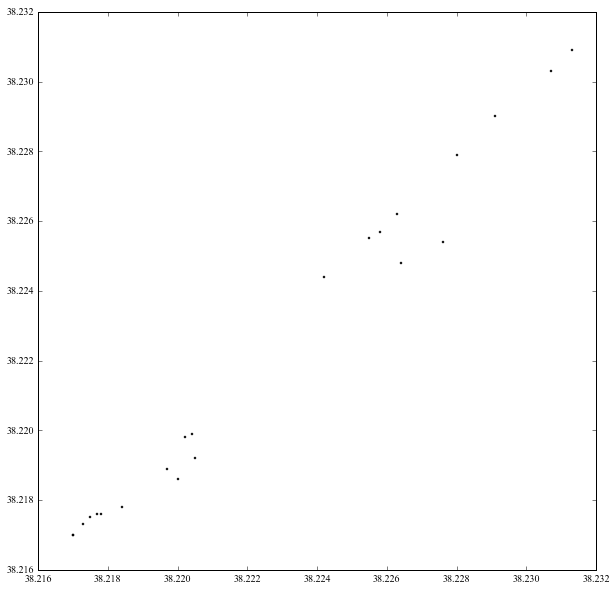

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.plot(salinity1, salinity2, 'ko', markersize=2)
plt.axis('equal')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.show()